# ВВЕДЕНИЕ
В данном файле будет проведен разведочный анализ данных (EDA) датасета, взятого с сайта kaggle.com.

Исходные данные с kaggle.com: https://www.kaggle.com/datasets/imranalishahh/sales-and-customer-insights

Ссылка на датасет в Google Drive: https://drive.google.com/file/d/1j7ZAFLYStESJoCrkH0-bLctoxV75djUf/view?usp=sharing

Данный датасет представляет собой результаты опроса студентов по уровню депрессии, собранные в рамках исследования факторов психического здоровья студентов в виде таблицы по 15 признакам:

Customer_ID - уникальный идентификатор клиента;  
Product_ID - уникальный идентификатор товара;  
Transaction_ID - уникальный идентификатор покупки (транзакции);  
Purchase_Frequency - количество покупок клиента за период;  
Average_Order_Value - средний чек клиента;  
Most_Frequent_Category - категория товаров, которую клиент покупает чаще всего;  
Time_Between_Purchases - среднее количество дней между покупками;
Region - географический регион, в котором находится клиент;  
Churn_Probability - вероятность того, что клиент уйдет (отток);
Lifetime_Value - прогнозируемая общая стоимость клиента за всё время сотрудничества;  
Launch_Date - дата запуска продукта;
Peak_Sales_Date - дата пиковых продаж для этого клиента или продукта;  
Season - сезон пика продаж;
Preferred_Purchase_Times - время суток, когда клиент чаще всего совершает покупки;  
Retention_Strategy - стратегия удержания клиента.

# Цель анализа данных

Какая стратегия удержания чаще всего используется для клиентов с высоким риском оттока? И меняется ли успешность стратегии удержания в зависимости от региона и сферы интересов?

## 1. Загрузка датасета

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'notebook'


file_id = "1j7ZAFLYStESJoCrkH0-bLctoxV75djUf"
file_url = f"https://drive.google.com/uc?id={file_id}"
df = pd.read_csv(file_url)

Выведем первые и последние 10 строк датасета:

In [2]:
df.head(10)

,Customer_ID,Product_ID,Transaction_ID,Purchase_Frequency,Average_Order_Value,Most_Frequent_Category,Time_Between_Purchases,Region,Churn_Probability,Lifetime_Value,Launch_Date,Peak_Sales_Date,Season,Preferred_Purchase_Times,Retention_Strategy
0,CUST_9HOS83,PROD_IK97D1,TRANS_II1DZG,17,172.57,Electronics,45,South America,0.98,952.81,2020-03-14,2023-09-11,Winter,Afternoon,Loyalty Program
1,CUST_AJU17N,PROD_UNN7KP,TRANS_9HJF7I,10,64.89,Clothing,6,South America,0.66,5427.51,2022-10-15,2023-01-02,Spring,Afternoon,Discount
2,CUST_11XNYF,PROD_0XEW2W,TRANS_OT96OM,3,120.38,Sports,23,Asia,0.60,3994.80,2021-11-30,2023-04-06,Winter,Evening,Loyalty Program
3,CUST_IGH8G3,PROD_3IIAJN,TRANS_45V00G,12,70.34,Clothing,5,North America,0.78,4880.01,2022-03-20,2023-03-23,Spring,Evening,Discount
4,CUST_OK6PUM,PROD_VMIWD2,TRANS_ZAK760,18,42.39,Electronics,10,North America,0.52,8557.70,2022-11-09,2023-10-28,Spring,Morning,Discount
5,CUST_63F5GB,PROD_L0NAD5,TRANS_HI4MBV,12,132.90,Electronics,42,Europe,0.25,8215.33,2020-12-26,2023-12-09,Winter,Evening,Loyalty Program
6,CUST_P9K9F2,PROD_CVVCB0,TRANS_X0MXCI,16,128.43,Clothing,38,Europe,0.94,7031.07,2022-03-15,2023-09-06,Summer,Afternoon,Email Campaign
7,CUST_EMHZQV,PROD_PVOV5L,TRANS_9B8B46,10,67.52,Electronics,56,Asia,0.56,5167.16,2021-02-17,2023-06-12,Summer,Afternoon,Discount
8,CUST_8E2Q1K,PROD_MG36BV,TRANS_AZ1OW8,7,165.26,Electronics,73,Europe,0.17,9943.51,2021-03-28,2023-02-05,Winter,Evening,Loyalty Program
9,CUST_4VB1T5,PROD_DKK6UZ,TRANS_AC3353,6,52.86,Home,60,North America,0.59,9978.11,2021-08-16,2023-10-06,Winter,Evening,Loyalty Program


In [3]:
df.tail(10)

,Customer_ID,Product_ID,Transaction_ID,Purchase_Frequency,Average_Order_Value,Most_Frequent_Category,Time_Between_Purchases,Region,Churn_Probability,Lifetime_Value,Launch_Date,Peak_Sales_Date,Season,Preferred_Purchase_Times,Retention_Strategy
9990,CUST_YS62WF,PROD_XWOHK5,TRANS_OYHBTJ,3,160.03,Home,86,Asia,0.97,3836.21,2022-07-04,2023-02-24,Spring,Morning,Email Campaign
9991,CUST_0HGSIM,PROD_IRMPBR,TRANS_O6T8X2,8,116.37,Sports,73,South America,0.98,325.87,2022-07-09,2023-05-25,Winter,Afternoon,Loyalty Program
9992,CUST_LRGIIG,PROD_ZHK3A0,TRANS_0FGK18,6,131.72,Sports,6,Europe,0.22,8260.91,2021-07-01,2023-01-08,Spring,Evening,Discount
9993,CUST_EQM9Y4,PROD_K3Y4BL,TRANS_STZEZO,17,41.78,Electronics,68,South America,0.49,4006.52,2021-08-08,2023-02-17,Winter,Afternoon,Email Campaign
9994,CUST_929WCK,PROD_PQ6AF5,TRANS_L2CSF0,14,169.43,Electronics,68,South America,0.86,7160.70,2020-10-03,2023-10-08,Spring,Morning,Email Campaign
9995,CUST_BIH0QW,PROD_AAPCHD,TRANS_EP2EGL,15,162.51,Clothing,72,Europe,0.84,1154.61,2022-03-04,2023-02-10,Winter,Evening,Loyalty Program
9996,CUST_DWJAD2,PROD_XWJQE5,TRANS_X7OPB7,18,63.02,Clothing,68,Europe,0.03,593.22,2021-08-21,2023-02-06,Spring,Morning,Loyalty Program
9997,CUST_43HBYL,PROD_PL3BU5,TRANS_VSZM3Y,15,116.80,Home,72,Asia,0.61,4676.35,2020-09-13,2023-05-05,Spring,Evening,Discount
9998,CUST_0SX4MD,PROD_X5O49V,TRANS_B2YCHY,12,144.21,Electronics,38,North America,0.05,6850.85,2020-01-26,2023-08-03,Summer,Morning,Discount
9999,CUST_U1AP5I,PROD_CTS1GQ,TRANS_IBPVC5,3,91.32,Electronics,6,Europe,0.67,1549.00,2021-04-17,2023-01-25,Fall,Morning,Discount


Некоторые поля имеют пробелы, поэтому необходимо это исправить:

In [4]:
df.columns = (
    df.columns.str.strip()
    .str.replace(" ", "_", regex=False)
    .str.replace("/", "_or_", regex=False)
)
print(df.columns)

Index(['Customer_ID', 'Product_ID', 'Transaction_ID', 'Purchase_Frequency',
       'Average_Order_Value', 'Most_Frequent_Category',
       'Time_Between_Purchases', 'Region', 'Churn_Probability',
       'Lifetime_Value', 'Launch_Date', 'Peak_Sales_Date', 'Season',
       'Preferred_Purchase_Times', 'Retention_Strategy'],
      dtype='object')


## 2. Приведение типов данных
Проверка размера датасета и количества признаков

In [5]:
df.shape

(10000, 15)

Проверка типов данных

In [6]:
df.dtypes

Customer_ID                  object
Product_ID                   object
Transaction_ID               object
Purchase_Frequency            int64
Average_Order_Value         float64
Most_Frequent_Category       object
Time_Between_Purchases        int64
Region                       object
Churn_Probability           float64
Lifetime_Value              float64
Launch_Date                  object
Peak_Sales_Date              object
Season                       object
Preferred_Purchase_Times     object
Retention_Strategy           object
dtype: object

Кажется, что Product_ID не содержат повторяющихся значений. Количество строк с повторяющимися Product_ID:

In [7]:
duplicate_count = df[df['Product_ID'].duplicated(keep=False)].shape[0]
print(duplicate_count)

0


Признак можно Product_ID убрать

In [8]:
df = df.drop(["Product_ID"], axis=1)
df.head(10)

,Customer_ID,Transaction_ID,Purchase_Frequency,Average_Order_Value,Most_Frequent_Category,Time_Between_Purchases,Region,Churn_Probability,Lifetime_Value,Launch_Date,Peak_Sales_Date,Season,Preferred_Purchase_Times,Retention_Strategy
0,CUST_9HOS83,TRANS_II1DZG,17,172.57,Electronics,45,South America,0.98,952.81,2020-03-14,2023-09-11,Winter,Afternoon,Loyalty Program
1,CUST_AJU17N,TRANS_9HJF7I,10,64.89,Clothing,6,South America,0.66,5427.51,2022-10-15,2023-01-02,Spring,Afternoon,Discount
2,CUST_11XNYF,TRANS_OT96OM,3,120.38,Sports,23,Asia,0.60,3994.80,2021-11-30,2023-04-06,Winter,Evening,Loyalty Program
3,CUST_IGH8G3,TRANS_45V00G,12,70.34,Clothing,5,North America,0.78,4880.01,2022-03-20,2023-03-23,Spring,Evening,Discount
4,CUST_OK6PUM,TRANS_ZAK760,18,42.39,Electronics,10,North America,0.52,8557.70,2022-11-09,2023-10-28,Spring,Morning,Discount
5,CUST_63F5GB,TRANS_HI4MBV,12,132.90,Electronics,42,Europe,0.25,8215.33,2020-12-26,2023-12-09,Winter,Evening,Loyalty Program
6,CUST_P9K9F2,TRANS_X0MXCI,16,128.43,Clothing,38,Europe,0.94,7031.07,2022-03-15,2023-09-06,Summer,Afternoon,Email Campaign
7,CUST_EMHZQV,TRANS_9B8B46,10,67.52,Electronics,56,Asia,0.56,5167.16,2021-02-17,2023-06-12,Summer,Afternoon,Discount
8,CUST_8E2Q1K,TRANS_AZ1OW8,7,165.26,Electronics,73,Europe,0.17,9943.51,2021-03-28,2023-02-05,Winter,Evening,Loyalty Program
9,CUST_4VB1T5,TRANS_AC3353,6,52.86,Home,60,North America,0.59,9978.11,2021-08-16,2023-10-06,Winter,Evening,Loyalty Program


Учитвая текущую задачу имеет смысл отсавить признаки: Customer_ID, Most_Frequent_Category, Region, Churn_Probability, Retention_Strategy

In [9]:
df = df[["Customer_ID", "Most_Frequent_Category", "Region", "Churn_Probability", "Retention_Strategy"]]
df.head(10)

,Customer_ID,Most_Frequent_Category,Region,Churn_Probability,Retention_Strategy
0,CUST_9HOS83,Electronics,South America,0.98,Loyalty Program
1,CUST_AJU17N,Clothing,South America,0.66,Discount
2,CUST_11XNYF,Sports,Asia,0.60,Loyalty Program
3,CUST_IGH8G3,Clothing,North America,0.78,Discount
4,CUST_OK6PUM,Electronics,North America,0.52,Discount
5,CUST_63F5GB,Electronics,Europe,0.25,Loyalty Program
6,CUST_P9K9F2,Clothing,Europe,0.94,Email Campaign
7,CUST_EMHZQV,Electronics,Asia,0.56,Discount
8,CUST_8E2Q1K,Electronics,Europe,0.17,Loyalty Program
9,CUST_4VB1T5,Home,North America,0.59,Loyalty Program


Приведение типов данных для оставшихся признаков:

In [10]:
df = df.replace("?", np.nan)
df = df.astype(
    {
        "Customer_ID": "string",
        "Most_Frequent_Category": "string",
        "Region": "string",
        "Churn_Probability": "float64",
        "Retention_Strategy": "string",
    }
)
df.dtypes

Customer_ID               string[python]
Most_Frequent_Category    string[python]
Region                    string[python]
Churn_Probability                float64
Retention_Strategy        string[python]
dtype: object

## 3. Проверка данных на отсутствие пропусков, уникальность идентификаторов и ключей

In [11]:
df.notna().all()

Customer_ID               True
Most_Frequent_Category    True
Region                    True
Churn_Probability         True
Retention_Strategy        True
dtype: bool

Оценка наличия nullable полей:

In [12]:
df.isnull().all()

Customer_ID               False
Most_Frequent_Category    False
Region                    False
Churn_Probability         False
Retention_Strategy        False
dtype: bool

Оценка среднего значения непустых данных по каждому полю:

In [13]:
df.notna().mean().sort_values(ascending=False)

Customer_ID               1.0
Most_Frequent_Category    1.0
Region                    1.0
Churn_Probability         1.0
Retention_Strategy        1.0
dtype: float64

Условие метрики о полноте данных выполняется (>= 0.98).

Проверка уникальности данных:

In [14]:
dup_count = df.duplicated(subset=['Customer_ID']).sum()
print("Дубликаты Customer_ID:", dup_count)
id_unique = df['Customer_ID'].is_unique
print("Уникальность Customer_ID:", id_unique)
print("Количество уникальных Customer_ID:", df['Customer_ID'].nunique())
duplicate_rate = dup_count / df.shape[0]
print(f"Коэффициент повторений: {duplicate_rate:.4f}")

Дубликаты Customer_ID: 0
Уникальность Customer_ID: True
Количество уникальных Customer_ID: 10000
Коэффициент повторений: 0.0000


Условие метрики об уникальности данных выполняется

## 4. Проверка на выбросы и аномалии

Для данной части анализа будет применен метод 1,5 IQR.

In [15]:
col = 'Churn_Probability'
data = df[col].dropna()

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (data < lower_bound) | (data > upper_bound)
n_outliers = outliers.sum()
outlier_ratio = n_outliers / len(data)

print(f"Количество выбросов: {n_outliers}")
print(f"Доля выбросов: {outlier_ratio}")

Количество выбросов: 0
Доля выбросов: 0.0


## 5. Проверка взаимосвязей признаков и их согласованности

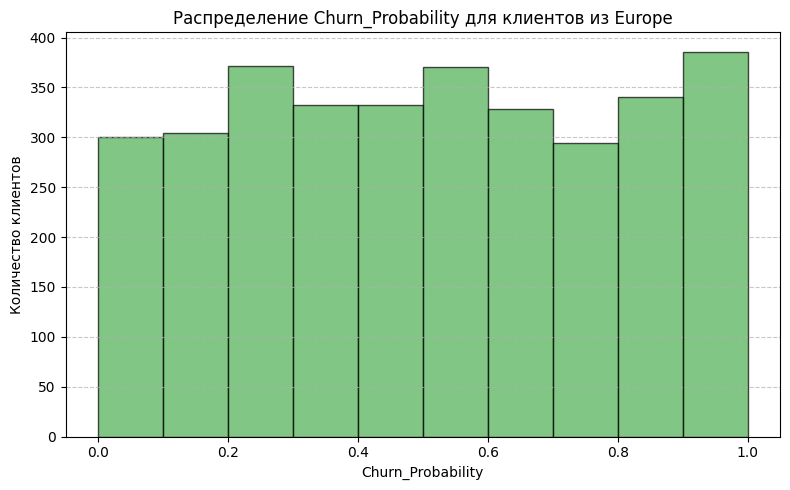

In [27]:
# Фильтрация данных: только клиенты из Europe
europe_data = df[df['Retention_Strategy'] == 'Email Campaign']

# Построение гистограммы
plt.figure(figsize=(8, 5))
plt.hist(europe_data['Churn_Probability'], bins=10, color='#4CAF50', edgecolor='black', alpha=0.7)
plt.title('Распределение Churn_Probability для клиентов из Europe')
plt.xlabel('Churn_Probability')
plt.ylabel('Количество клиентов')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()